In [1]:
#Import the libaries
import numpy as np 
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore') # To supress warnings
sns.set(style="whitegrid") # set the background for the graphs

In [2]:
#import the file 
shooting_data = pd.read_excel('../../shootings.xlsx')

In [3]:
#print the data 
shooting_data

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,5916,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,5925,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,5918,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,5921,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns


In [4]:
#print the data dtypes of each column
shooting_data.dtypes

id                                  int64
name                               object
date                       datetime64[ns]
manner_of_death                    object
armed                              object
age                               float64
gender                             object
race                               object
city                               object
state                              object
signs_of_mental_illness              bool
threat_level                       object
flee                               object
body_camera                          bool
arms_category                      object
dtype: object

In [5]:
#change the object to categories data 
shooting_data.name= shooting_data['name'].astype('category')
shooting_data.manner_of_death = shooting_data['manner_of_death'].astype('category')
shooting_data.armed = shooting_data['armed'].astype('category')
shooting_data.gender = shooting_data['gender'].astype('category')
shooting_data.race=shooting_data['race'].astype('category')
shooting_data.city=shooting_data['city'].astype('category')
shooting_data.state=shooting_data['state'].astype('category')
shooting_data.threat_level=shooting_data['threat_level'].astype('category')
shooting_data.flee=shooting_data['flee'].astype('category')
shooting_data.arms_category=shooting_data['arms_category'].astype('category')

In [6]:
#change the age value to an integer cause no one has float age
shooting_data.age = pd.Series(data=shooting_data.age, dtype='int')

In [11]:
#print out data fields which duplicated is summerized
shooting_data.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
4890    False
4891    False
4892    False
4893    False
4894    False
Length: 4895, dtype: bool

In [17]:
#show the numerial values 
numerical_data = shooting_data.select_dtypes(include=[np.number])
numerical_data

,id,age
0,3,53
1,4,47
2,5,23
3,8,32
4,9,39
...,...,...
4890,5916,27
4891,5925,23
4892,5918,25
4893,5921,22


In [8]:
#show empty columns fields
shooting_data.isnull()
#summerize
shooting_data.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              0
dtype: int64

In [28]:
#show the various data columns
shooting_data.columns


Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'arms_category'],
      dtype='object')

In [29]:
#describe the data we will use 
shooting_data.describe()

,id,age
count,4895.000000,4895.000000
mean,2902.148519,36.547702
std,1683.467910,12.694266
min,3.000000,6.000000
25%,1441.500000,27.000000
50%,2847.000000,35.000000
75%,4352.500000,45.000000
max,5925.000000,91.000000


In [38]:
#value count of each data values
shooting_data.age.value_counts()
shooting_data.armed.value_counts()
shooting_data.city.value_counts()
shooting_data.state.value_counts()
shooting_data.manner_of_death.value_counts()
shooting_data.signs_of_mental_illness.value_counts()
shooting_data.threat_level.value_counts()
shooting_data.flee.value_counts()
shooting_data.body_camera.value_counts()
shooting_data.arms_category.value_counts()

Guns                     2764
Sharp objects             818
Unknown                   418
Unarmed                   348
Other unusual objects     192
Blunt instruments         122
Vehicles                  121
Multiple                   54
Piercing objects           29
Electrical devices         24
Explosives                  4
Hand tools                  1
Name: arms_category, dtype: int64

<AxesSubplot:title={'center':'Age with density'}, xlabel='age', ylabel='Density'>

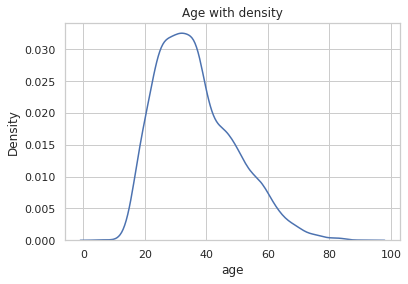

In [52]:
#plot the data values
plt.title('Age with density')
sns.kdeplot(data=shooting_data['age'])

<Figure size 720x1080 with 0 Axes>

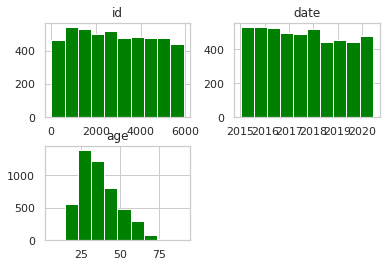

In [49]:
plt.figure(figsize=(10,15))

shooting_data.hist(bins=10,color='green')
plt.show()

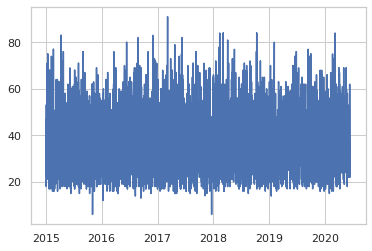

In [42]:
#show the age and date that indicence 
plt.plot_date(data=shooting_data,x='date',y='age',fmt='b')

In [31]:
#the years that had more attacks


<Figure size 720x720 with 0 Axes>

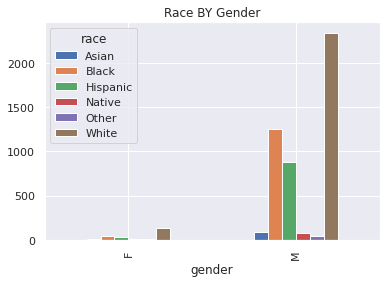

In [22]:
plt.figure(figsize=(10,10))
prd_gender=pd.crosstab(shooting_data['gender'],shooting_data['race'] )
#print(prd_gender)
ax=prd_gender.plot(kind='bar')
plt.title("Race BY Gender")
plt.legend
plt.show()

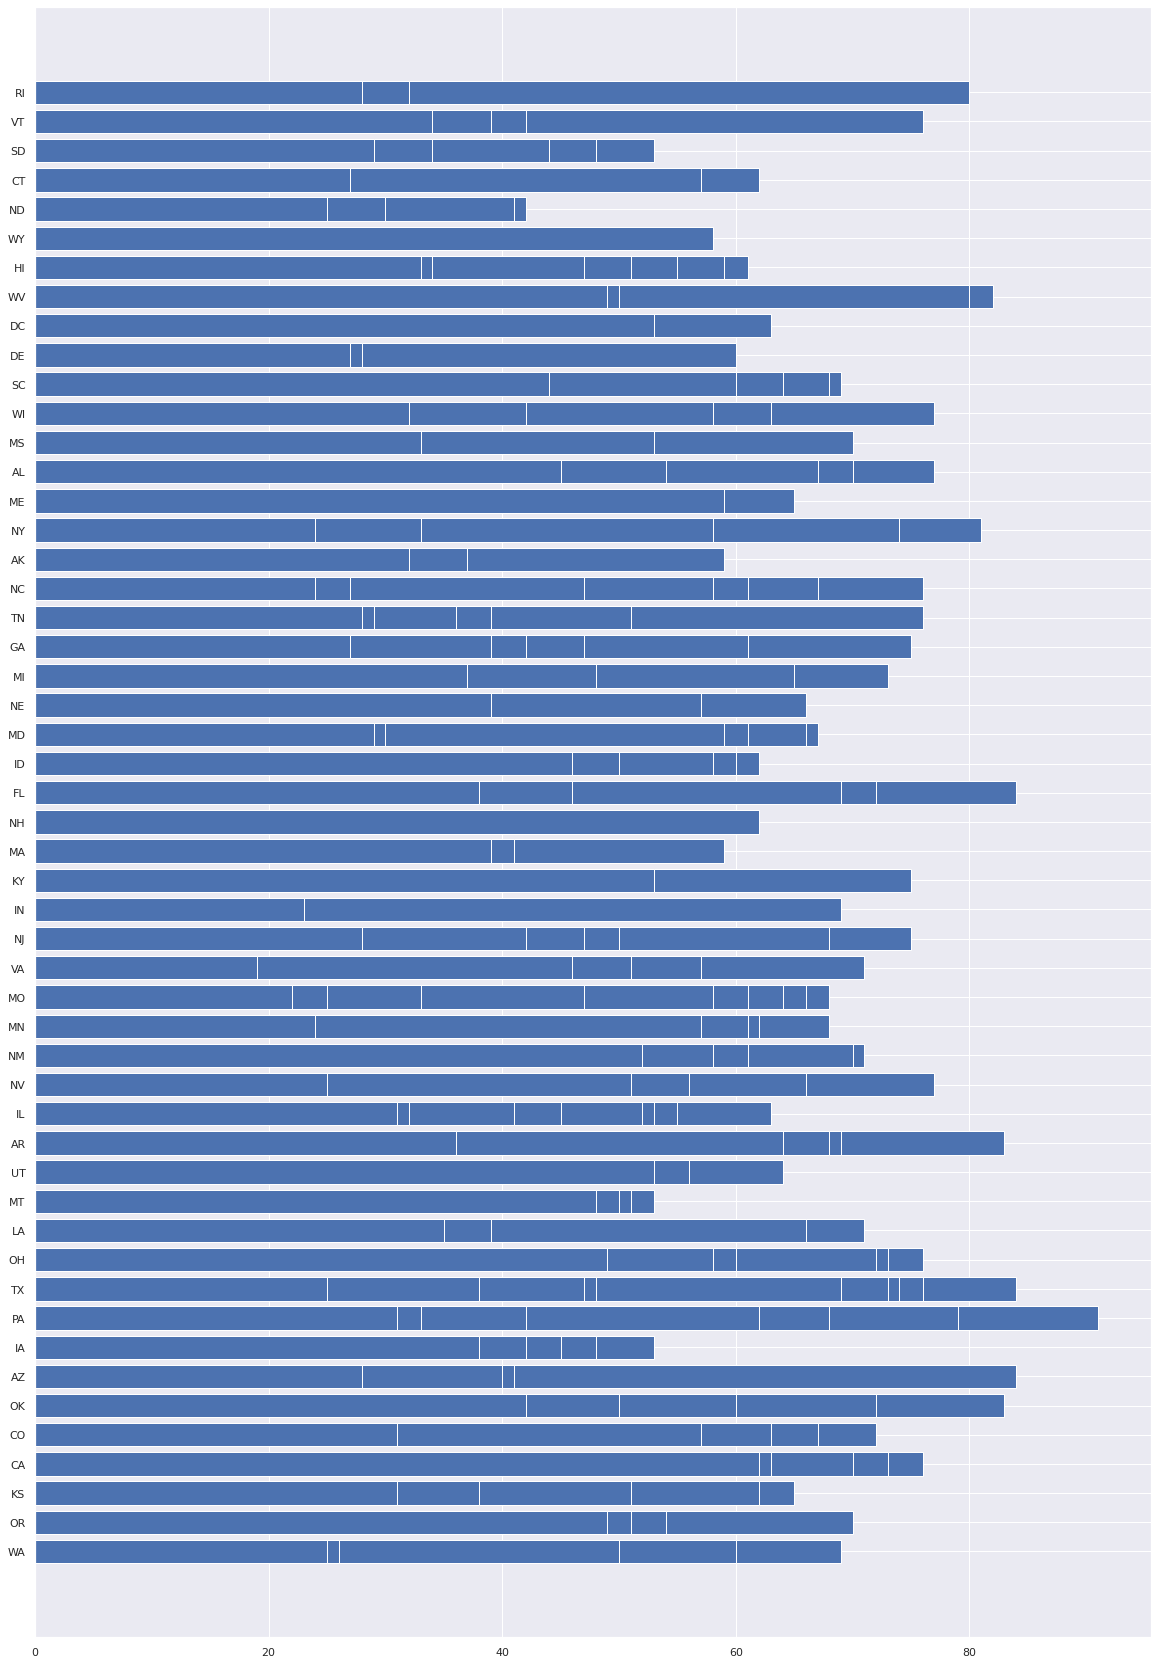

In [34]:
plt.figure(figsize=(20,30))
plt.barh(shooting_data['state'],shooting_data['age'])
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
prd_gender=pd.crosstab(shooting_data['race'],shooting_data['gender'] )
#print(prd_gender)
ax=prd_gender.plot(kind='bar')
plt.title("Race BY Gender")

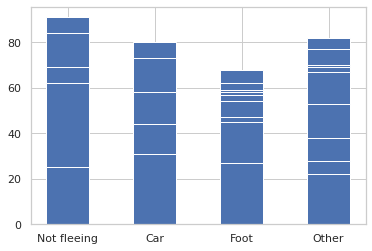

In [13]:
plt.bar(shooting_data['flee'],shooting_data['age'],width=0.5)
plt.show()

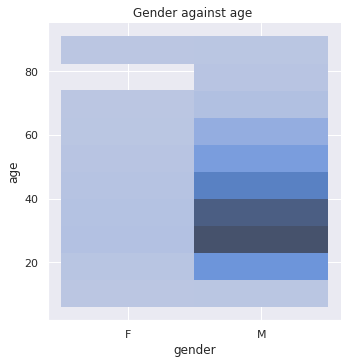

In [19]:
sns.set(style='darkgrid')
sns.displot(x=shooting_data['gender'],y=shooting_data['age'],bins=10,)
plt.title("Gender against age ")
plt.xlabel=("Gender")
plt.ylabel=('Age')

<BarContainer object of 4895 artists>

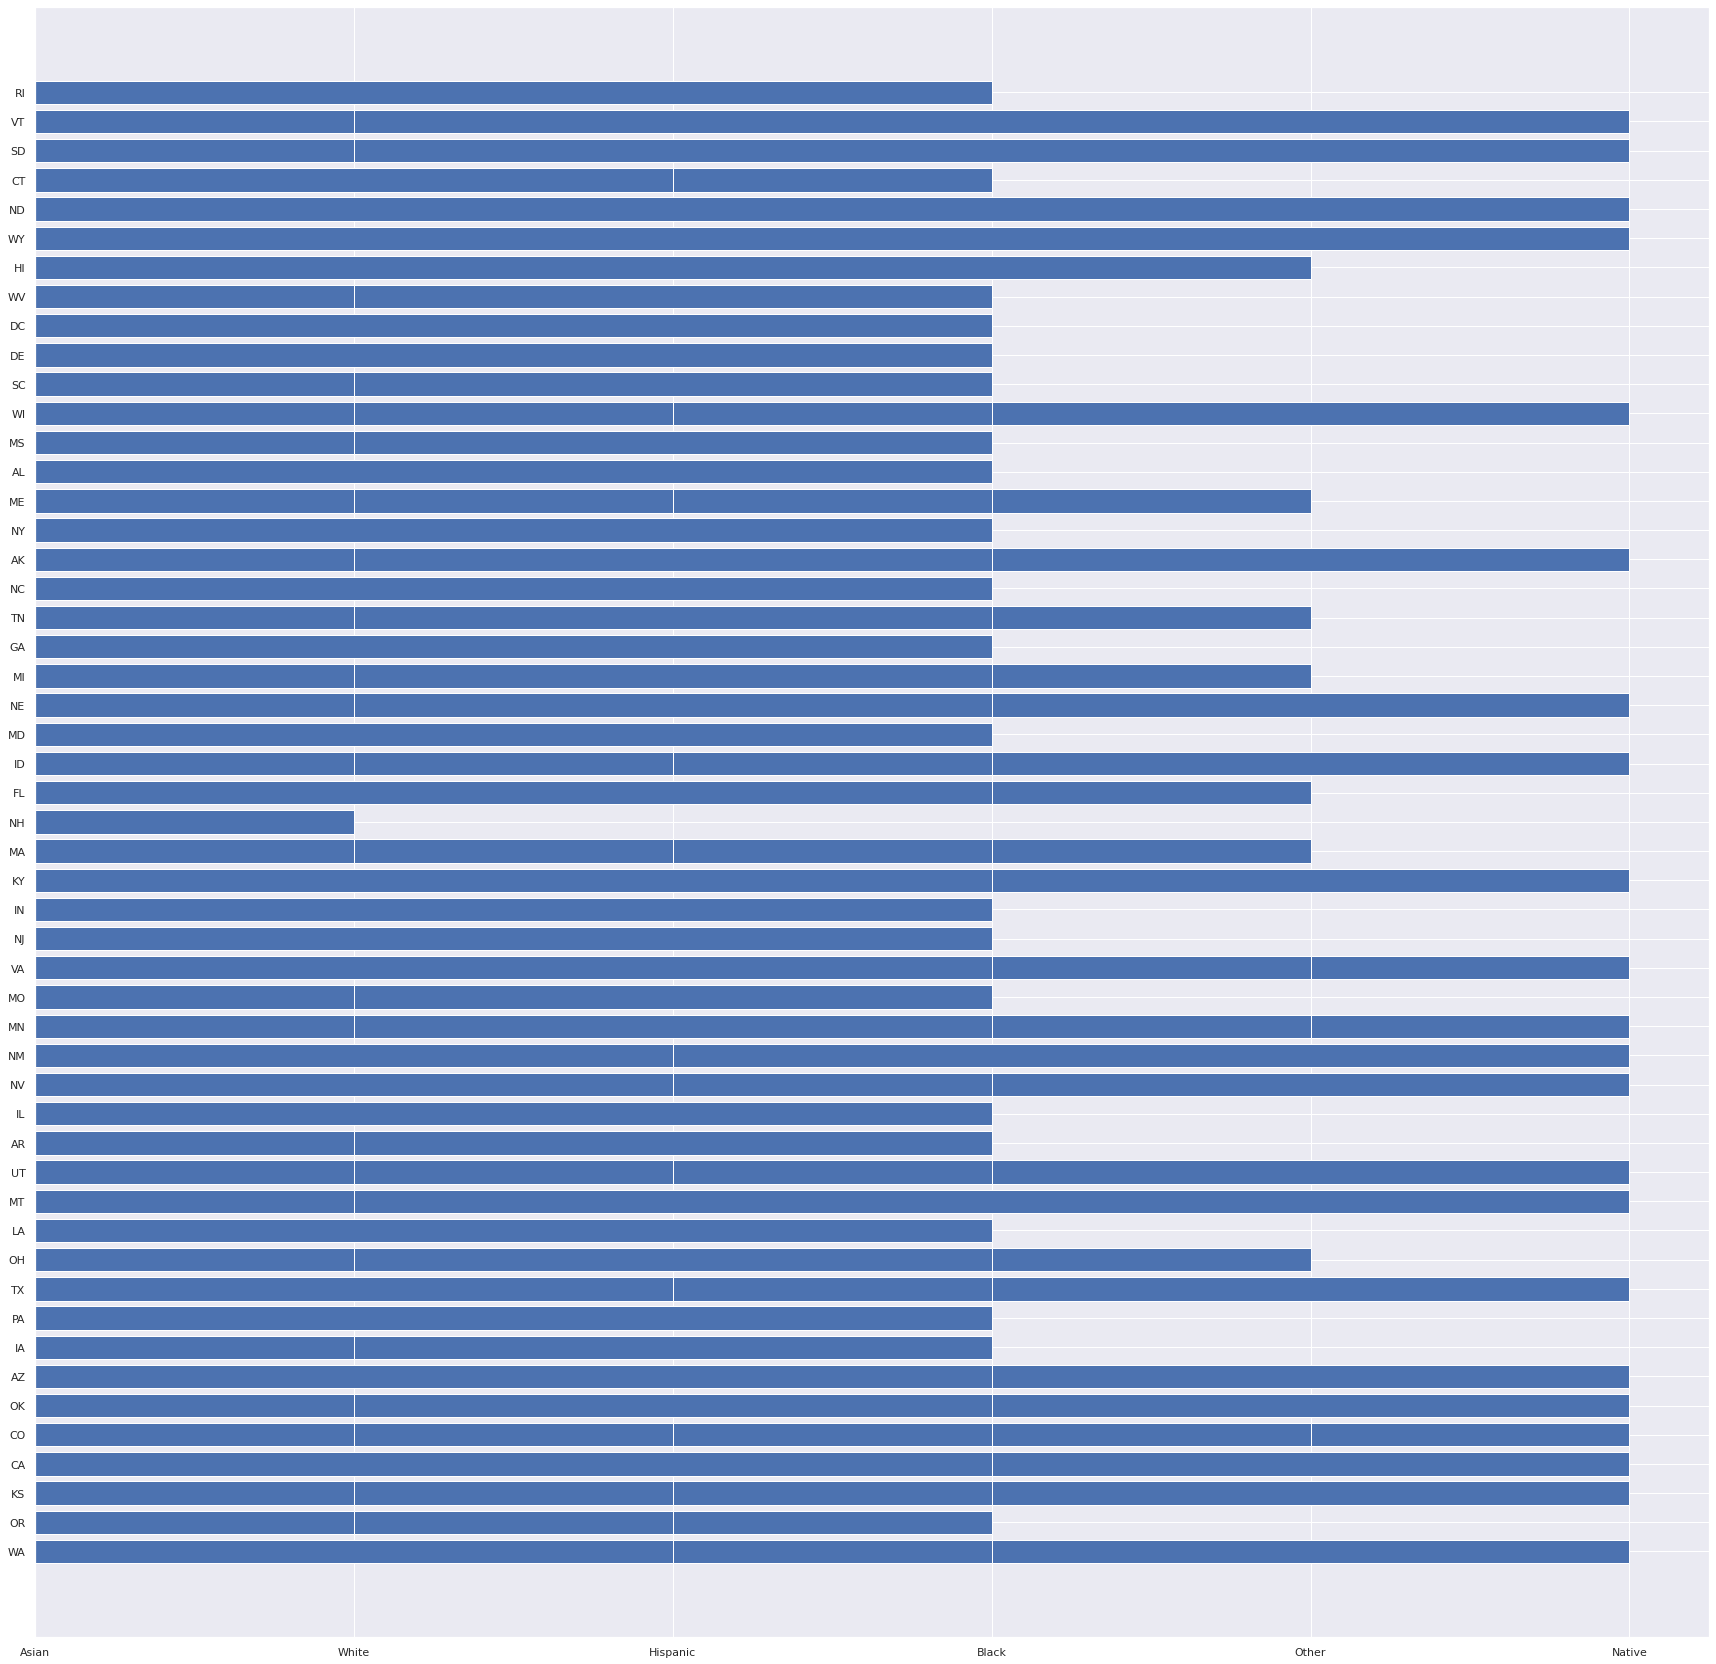

In [39]:
plt.figure(figsize=(30,30))
plt.barh(shooting_data['state'],shooting_data['race'])